# CUSTOMER SEGMENTATION

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
import pickle
from pathlib import Path

## Read Data

In [2]:
df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/customer_segments.txt', sep='\t')
df.head()

,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun
0,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927
1,CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700
2,CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5286429
3,CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5204498
4,CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_ID          50 non-null     object
 1   Nama Pelanggan       50 non-null     object
 2   Jenis Kelamin        50 non-null     object
 3   Umur                 50 non-null     int64 
 4   Profesi              50 non-null     object
 5   Tipe Residen         50 non-null     object
 6   NilaiBelanjaSetahun  50 non-null     int64 
dtypes: int64(2), object(5)
memory usage: 2.9+ KB


## Numerical Data Exploration

C:\Users\Reskur\anaconda3\envs\dqlabml_iki\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Reskur\anaconda3\envs\dqlabml_iki\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: scalar or None
  anchor: (float, float) or {'C', 'SW', 'S', 'SE', 'E', 'NE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or float
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: float or None
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  facecolor or fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool
  sketch_params: (scale: float, length: float, randomness: float)
 

C:\Users\Reskur\anaconda3\envs\dqlabml_iki\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Reskur\anaconda3\envs\dqlabml_iki\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


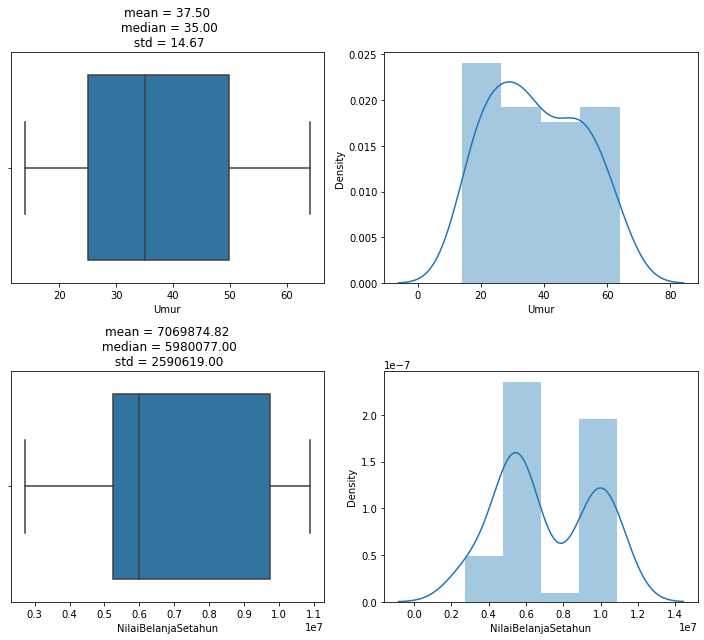

In [4]:
kolom_numerik=df[['Umur','NilaiBelanjaSetahun']]
fig, axs = plt.subplots(2,2, figsize=(10,9))
for i, feature in enumerate(kolom_numerik):
    sns.boxplot(df[feature], ax=axs[i][0])
    sns.distplot(df[feature], ax=axs[i][1])
    axs[i][0].set_title('mean = %.2f\n median = %.2f\n std = %.2f'%(df[feature].mean(), df[feature].median(), df[feature].std()))
    plt.setp(axs)
plt.tight_layout()
plt.show()


## Categorical Data Exploration

C:\Users\Reskur\anaconda3\envs\dqlabml_iki\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Reskur\anaconda3\envs\dqlabml_iki\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: scalar or None
  anchor: (float, float) or {'C', 'SW', 'S', 'SE', 'E', 'NE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or float
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: float or None
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  facecolor or fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool
  sketch_params: (scale: float, length: float, randomness: float)
 

C:\Users\Reskur\anaconda3\envs\dqlabml_iki\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: scalar or None
  anchor: (float, float) or {'C', 'SW', 'S', 'SE', 'E', 'NE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or float
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: float or None
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  facecolor or fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool
  sketch_params: (scale: float, length: float, randomness: float)
 

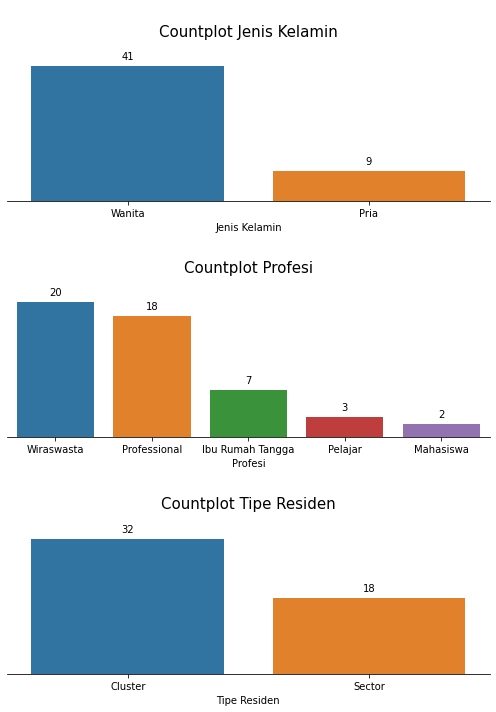

In [5]:
kolom_kategorical = ['Jenis Kelamin', 'Profesi', 'Tipe Residen']
fig, axs = plt.subplots(3,1,figsize=(7,10))
for i, kol in enumerate(kolom_kategorical):
    sns.countplot(df[kol], order=df[kol].value_counts().index, ax=axs[i])
    axs[i].set_title('\nCountplot %s\n'%(kol), fontsize=15)
    for p in axs[i].patches:
        axs[i].annotate(format(p.get_height(), '.0f'),
                       (p.get_x() + p.get_width()/2., p.get_height()),
                       ha='center',
                       va='center',
                       xytext=(0,10),
                       textcoords='offset points')
    sns.despine(right=True, top=True, left=True)
    axs[i].axes.yaxis.set_visible(False)
    plt.setp(axs[i])
    plt.tight_layout()
plt.show()

## Preparing Data For K-Prototypes Algorithm

In [6]:
#standardization
from sklearn.preprocessing import StandardScaler
kolom_numerikal = ['Umur', 'NilaiBelanjaSetahun']
print(df[kolom_numerikal].describe().round(1))

       Umur  NilaiBelanjaSetahun
count  50.0                 50.0
mean   37.5            7069874.8
std    14.7            2590619.0
min    14.0            2722700.0
25%    25.0            5257529.8
50%    35.0            5980077.0
75%    49.8            9739615.0
max    64.0           10884508.0


In [7]:
df_std = StandardScaler().fit_transform(df[kolom_numerikal])

In [8]:
#make a dataframe
df_std = pd.DataFrame(data=df_std, index=df.index, columns= df[kolom_numerikal].columns)
df_std.head()

,Umur,NilaiBelanjaSetahun
0,1.411245,0.946763
1,-1.617768,-1.695081
2,0.722833,-0.695414
3,1.067039,-0.727361
4,0.240944,1.382421


In [9]:
df_std.describe().round(1)

,Umur,NilaiBelanjaSetahun
count,50.0,50.0
mean,0.0,-0.0
std,1.0,1.0
min,-1.6,-1.7
25%,-0.9,-0.7
50%,-0.2,-0.4
75%,0.8,1.0
max,1.8,1.5


In [10]:
kolom_kategorikal = ['Jenis Kelamin', 'Profesi', 'Tipe Residen']
df_encoder = df[kolom_kategorikal].copy()
for col in kolom_kategorikal:
    df_encoder[col]=LabelEncoder().fit_transform(df_encoder[col])
print(df_encoder.head())

   Jenis Kelamin  Profesi  Tipe Residen
0              0        4             1
1              1        2             0
2              0        3             0
3              0        3             0
4              1        4             0


In [11]:
df_model = df_encoder.merge(df_std, left_index=True, right_index=True, how='left')
print(df_model.head())

   Jenis Kelamin  Profesi  Tipe Residen      Umur  NilaiBelanjaSetahun
0              0        4             1  1.411245             0.946763
1              1        2             0 -1.617768            -1.695081
2              0        3             0  0.722833            -0.695414
3              0        3             0  1.067039            -0.727361
4              1        4             0  0.240944             1.382421


## Find the Optimal Number of Clusters

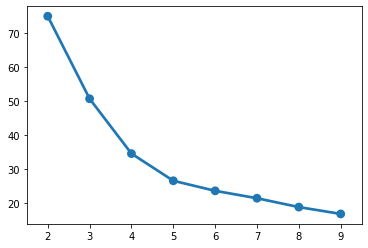

In [12]:
#using elbow plot
cost={}
for k in range(2,10):
    kproto = KPrototypes (n_clusters=k, random_state=75)
    kproto.fit_predict(df_model, categorical=[0,1,2])
    cost [k] = kproto.cost_
sns.pointplot(x=list(cost.keys()), y=list(cost.values()))
plt.show()

## Make a Model With KPrototypes

In [13]:
kproto = KPrototypes(n_clusters=5, random_state=75)
kproto = kproto.fit(df_model, categorical=[0,1,2])
pickle.dump(kproto, open('cluster.pkl', 'wb'))

In [14]:
#using the model
clusters = kproto.predict(df_model, categorical=[0,1,2])
print('segmen pelanggan: {}\n'.format(clusters))

segmen pelanggan: [1 0 2 2 3 4 1 2 4 4 2 2 1 1 3 4 4 2 3 0 3 2 4 3 3 2 3 4 2 2 0 1 0 3 4 3 4
 1 4 0 4 3 4 3 4 3 2 1 4 1]



## Combine Initial Data With Customer Segments

In [15]:
df_final = df.copy()
df_final['clusters'] = clusters
df_final.head()

,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,clusters
0,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927,1
1,CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700,0
2,CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5286429,2
3,CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5204498,2
4,CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206,3


In [16]:
#display the cluster for each customer
for i in range(0, 5):
    print('\nPelanggan Cluster: {}\n'.format(i))
    print(df_final[df_final['clusters']==i])


Pelanggan Cluster: 0

   Customer_ID    Nama Pelanggan Jenis Kelamin  Umur    Profesi Tipe Residen  \
1     CUST-002  Shirley Ratuwati        Wanita    14    Pelajar      Cluster   
19    CUST-020    Irene Novianto        Wanita    16    Pelajar       Sector   
30    CUST-031     Eviana Handry        Wanita    19  Mahasiswa      Cluster   
32    CUST-033   Cecilia Kusnadi        Wanita    19  Mahasiswa      Cluster   
39    CUST-040    Irene Darmawan        Wanita    14    Pelajar       Sector   

    NilaiBelanjaSetahun  clusters  
1               2722700         0  
19              2896845         0  
30              3042773         0  
32              3047926         0  
39              2861855         0  

Pelanggan Cluster: 1

   Customer_ID    Nama Pelanggan Jenis Kelamin  Umur     Profesi Tipe Residen  \
0     CUST-001      Budi Anggara          Pria    58  Wiraswasta       Sector   
6     CUST-007     Cahyono, Agus          Pria    64  Wiraswasta       Sector   
12    CUST-013

## Visualization of Clustering Results With Box Plot

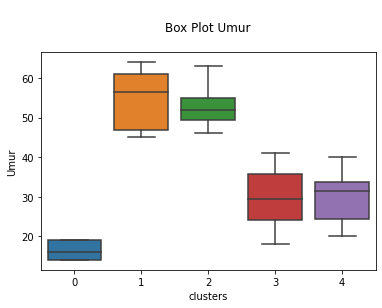

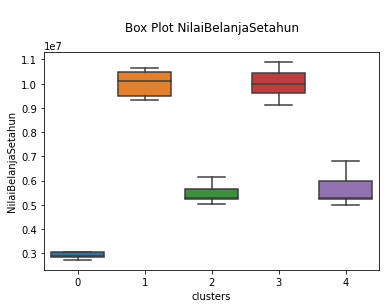

In [17]:

kolom_numerik = ['Umur', 'NilaiBelanjaSetahun']
for i in kolom_numerik:
    plt.figure(figsize=(6,4))
    ax = sns.boxplot(x='clusters', y=i, data=df_final)
    plt.title('\nBox Plot {}\n'.format (i), fontsize=12)
    plt.show()

## Visualization of Clustering Results With Count Plot

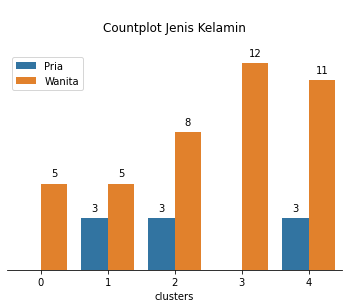

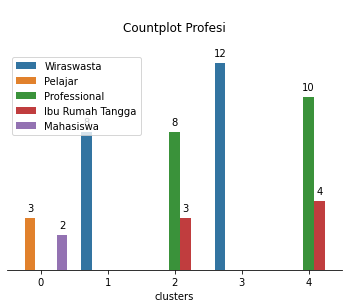

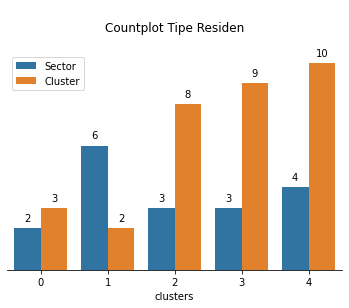

In [18]:
kolom_kategorikal = ['Jenis Kelamin', 'Profesi', 'Tipe Residen']
for i in kolom_kategorikal:
    plt.figure(figsize=(6,4))
    ax=sns.countplot(data=df_final, x='clusters', hue=i)
    plt.title('\nCountplot {}\n'.format(i), fontsize=12)
    ax.legend(loc='upper left')
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x()+p.get_width()/2., p.get_height()),
                   ha='center',
                   va='center',
                   xytext=(0,10),
                   textcoords='offset points')
    sns.despine(right=True, top=True, left=True)
    ax.axes.yaxis.set_visible(False)
    plt.show()

## Name the Clustered Results

In [19]:
df_final['segmen'] = df_final['clusters'].map({
    0:'Silver Students',
    1:'Diamond Senior Enterpreneur',
    2:'Gold Senior Members',
    3:'Diamond Young Enterpreneur',
    4:'Gold Young Member'
})
df_final.head()

,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,clusters,segmen
0,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927,1,Diamond Senior Enterpreneur
1,CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700,0,Silver Students
2,CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5286429,2,Gold Senior Members
3,CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5204498,2,Gold Senior Members
4,CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206,3,Diamond Young Enterpreneur
